In [1]:
from utility.raport_helper_functions import *
recipe_data = load_recipe_data()

# Projekt z przedmiotu *Eksploracja Danych*

## Etap 1: Zrozumienie problemu i danych

### Analizowany zbiór danych: **Brewer's Friend Beer Recipes**

#### Autorzy:
- Anna Sztukowska 188803
- Michał Sugalski 193290
- Lucjan Gackowski 193150

#### Ogólny opis zbioru

Zbiór **Brewer's Friend Beer Recipes** zawiera dane dotyczące domowych receptur piwa udostępnianych przez użytkowników platformy Brewer's Friend – narzędzia wspierającego amatorskich i półprofesjonalnych piwowarów. Każdy wiersz odpowiada jednej recepturze i zawiera ogólne parametry techniczne związane z procesem warzenia.
Dane obejmują szeroki zakres ogólnych parametrów warzenia, takich jak styl piwa, zawartość alkoholu (ABV), poziom goryczki (IBU), kolor (SRM), gęstość początkowa (OG) i końcowa (FG), metoda warzenia (np. all grain, extract), objętości na różnych etapach produkcji, a także temperatury fermentacji.
Dane mają postać numeryczną lub kategoryczną i mogą służyć do analizy trendów, porównań stylów piwa, klasteryzacji receptur lub budowy modeli predykcyjnych opartych na parametrach fizykochemicznych trunku.


#### Charakterystyka zbioru danych
- **Pochodzenie:** Dane zostały zebrane z platformy Brewer's Friend i udostępnione na Kaggle przez użytkownika jtrofe.
- **Format:** `.csv`
- **Liczba przykładów:** ponad 75 000 receptur piwa
- **Liczba atrybutów:** 23 kolumny opisujące właściwości każdej receptury
- **Struktura:** Zbiór składa się z dwóch plików:
  - `recipeData.csv` – główny zbiór zawierający informacje o recepturach piwa
  - `styleData.csv` – uzupełniający zbiór zawierający opisy stylów piwa

#### Wyniki eksploracyjnej analizy danych

##### Rozkłady wartości atrybutów


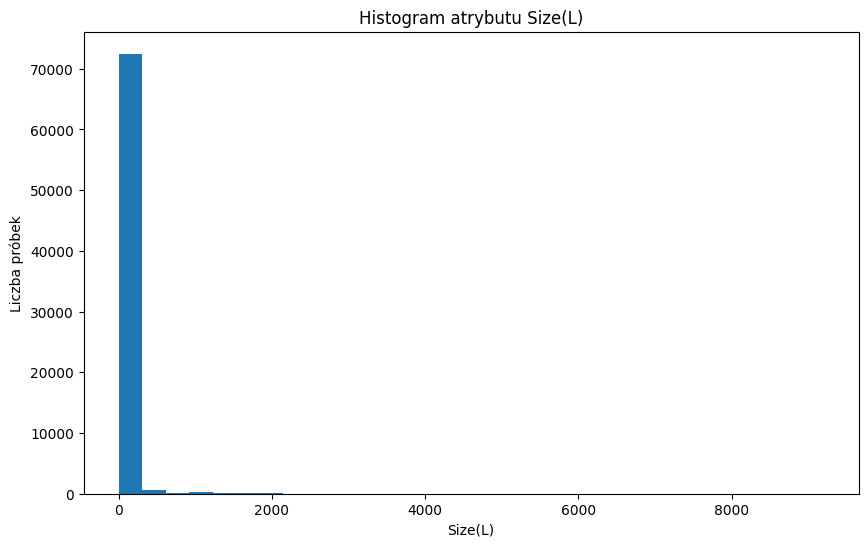

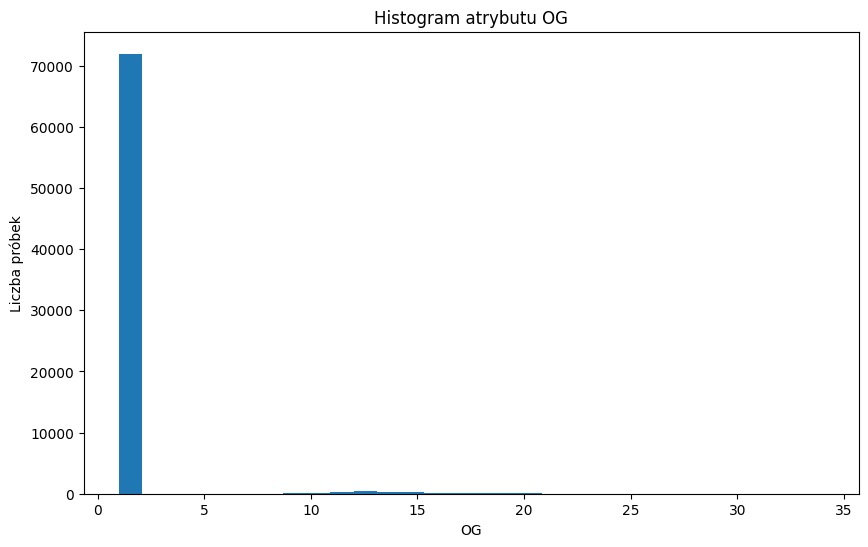

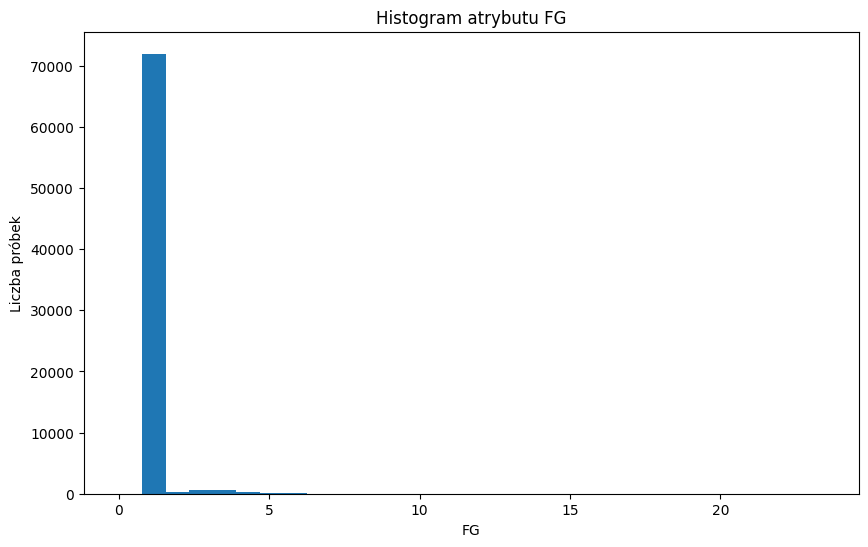

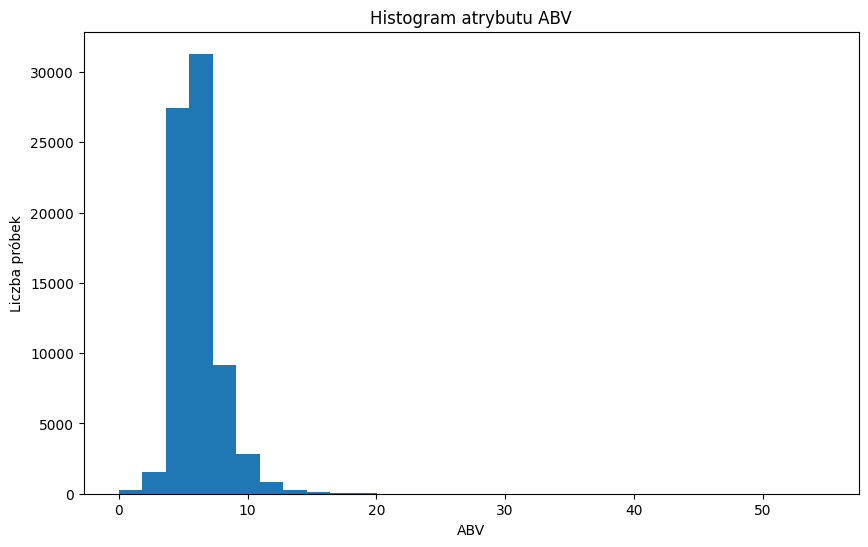

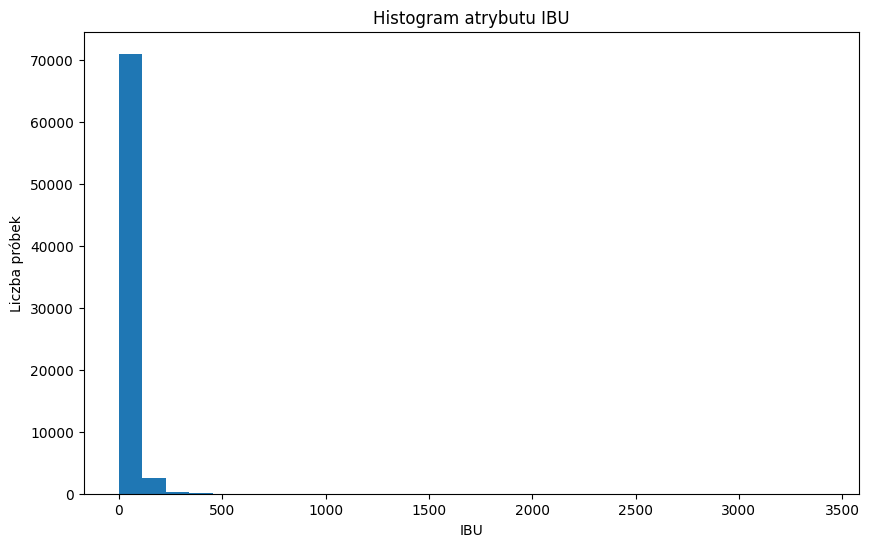

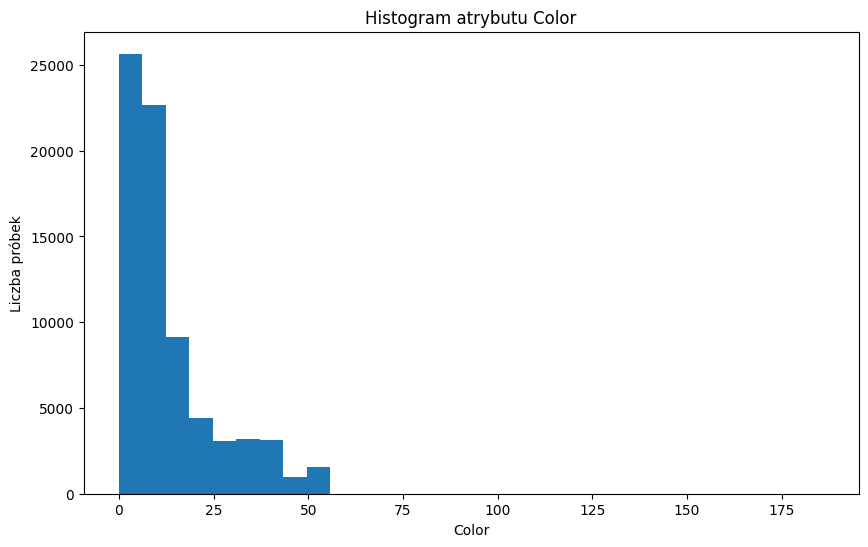

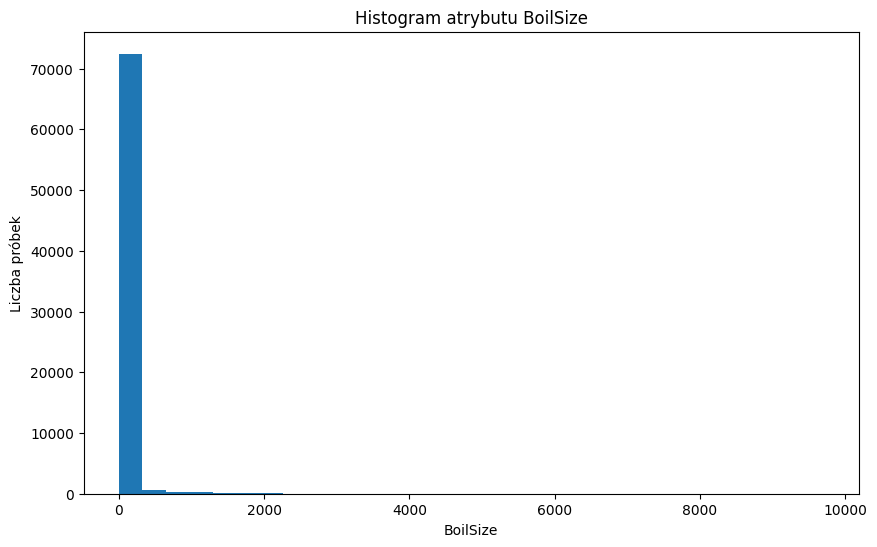

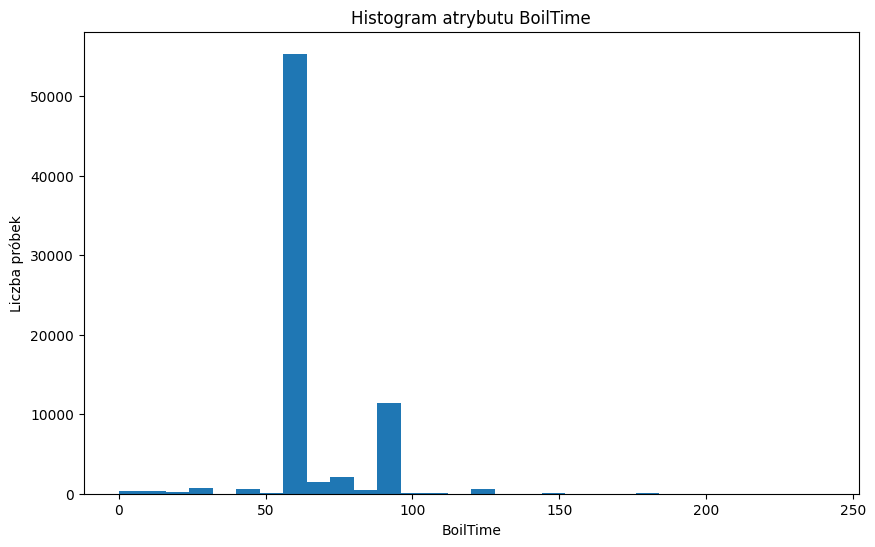

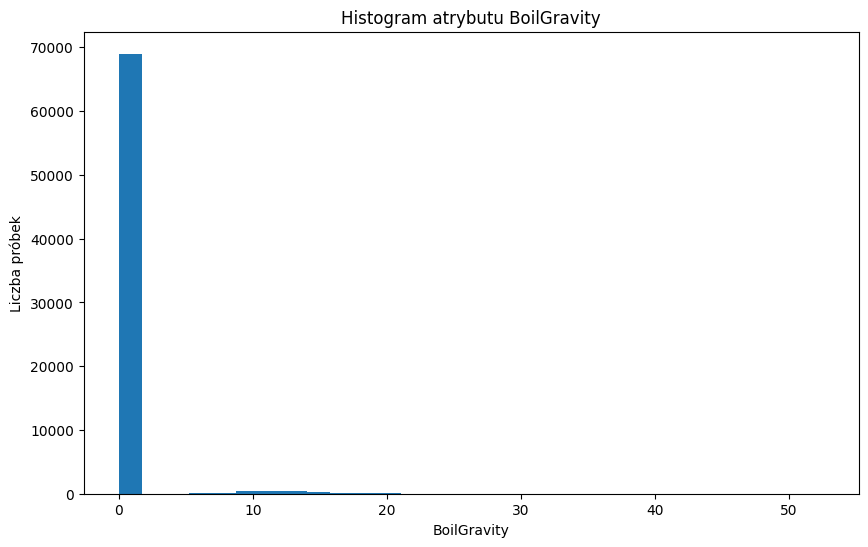

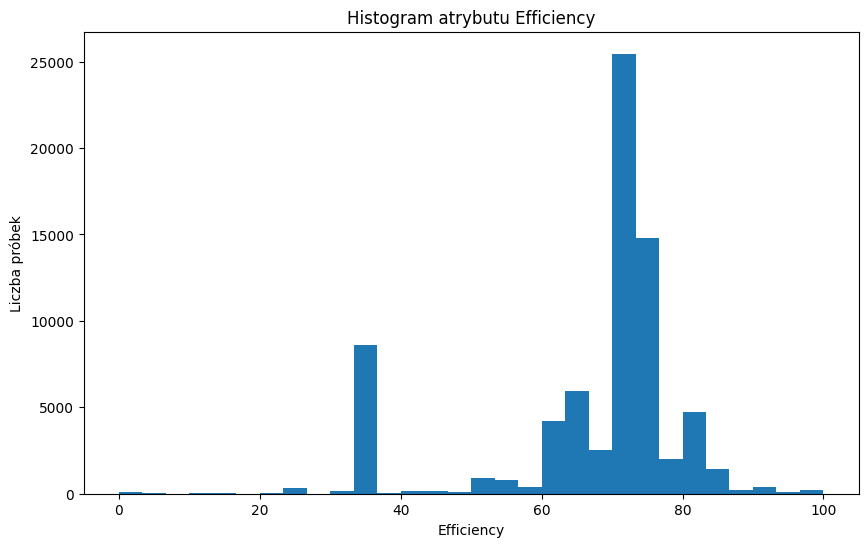

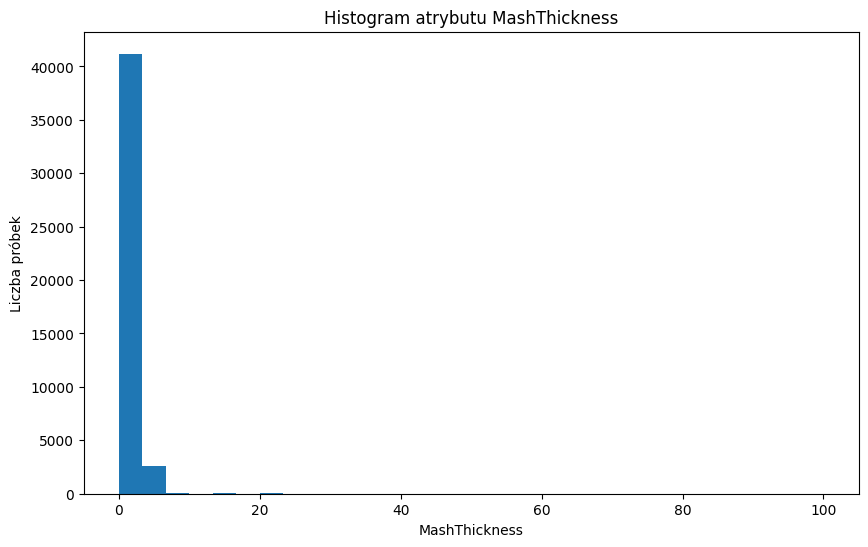

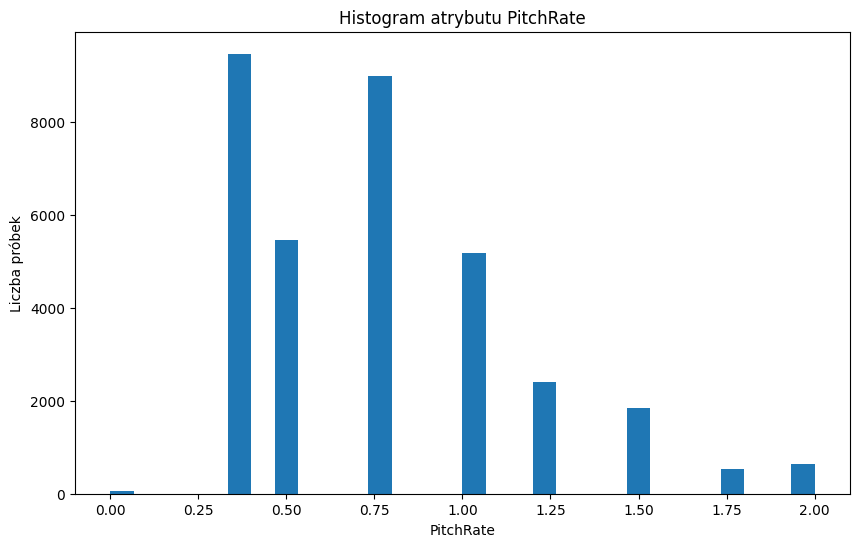

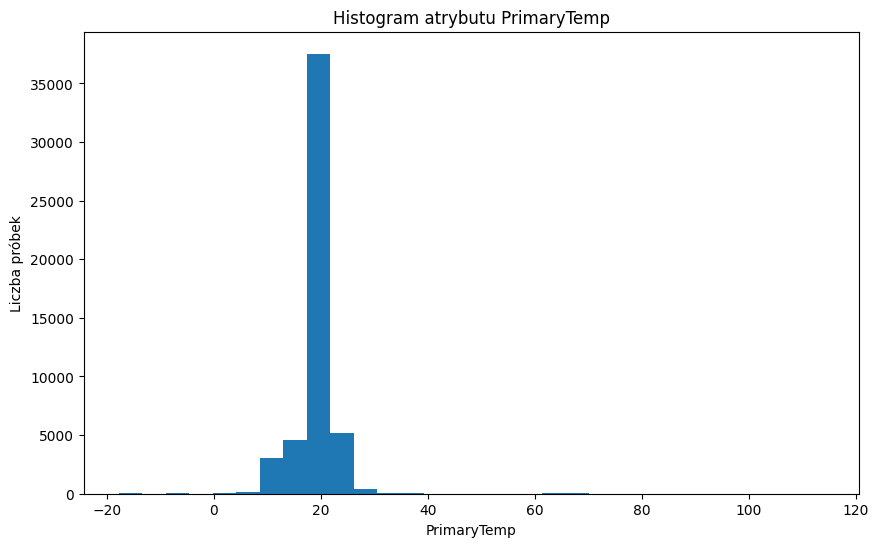

In [2]:
generate_histograms_for_dataset(recipe_data, bins=30)

##### Korelacje pomiędzy wartościami atrybutów

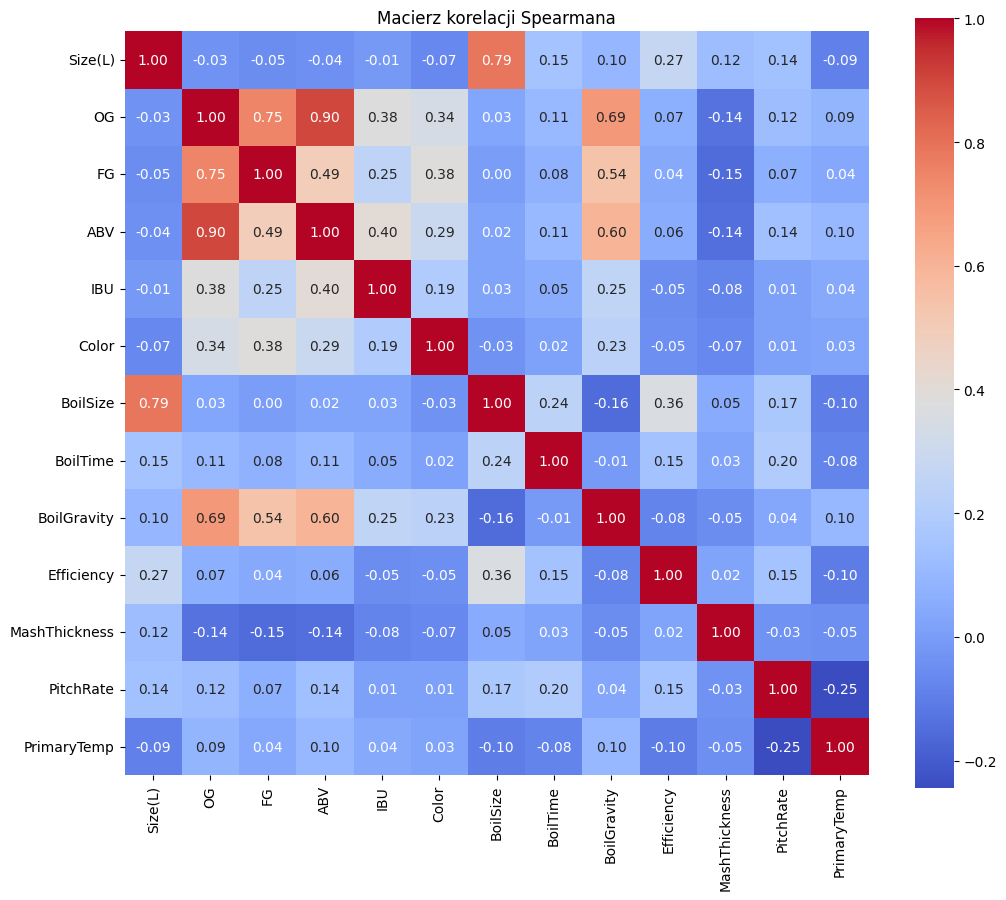

In [3]:
generate_spearman_matrix(recipe_data)